In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#grabbing the mnist dataset
train_data=pd.read_csv("CIFR(Ass2&3)/train_data.csv")
test_data=pd.read_csv("CIFR(Ass2&3)/test_data.csv")
X_train=train_data.drop("label",axis=1).values

X_test=test_data.drop("label",axis=1).values

Y_train=train_data["label"].values
Y_test=test_data["label"].values
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0


MemoryError: Unable to allocate 1.14 GiB for an array with shape (3073, 50000) and data type int64

In [ ]:
print(X_train.shape)
print(X_test.shape)

In [8]:
model = Sequential()
model.add(Flatten(input_shape=(3072,)))
model.add(Dense(512,  activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [10]:
adm=Adam(0.01)
epochs=8
model.compile(loss="sparse_categorical_crossentropy",optimizer=adm,metrics=["accuracy"])
tf=model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=epochs,batch_size=256)

Epoch 1/8
196/196 [==============================] - 6s 24ms/step - loss: 3.0570 - accuracy: 0.2385 - val_loss: 1.8579 - val_accuracy: 0.3154
Epoch 2/8
196/196 [==============================] - 4s 22ms/step - loss: 1.8131 - accuracy: 0.3409 - val_loss: 1.7817 - val_accuracy: 0.3622
Epoch 3/8
196/196 [==============================] - 4s 21ms/step - loss: 1.7618 - accuracy: 0.3636 - val_loss: 1.7563 - val_accuracy: 0.3657
Epoch 4/8
196/196 [==============================] - 4s 22ms/step - loss: 1.7187 - accuracy: 0.3782 - val_loss: 1.7079 - val_accuracy: 0.3799
Epoch 5/8
196/196 [==============================] - 4s 22ms/step - loss: 1.6816 - accuracy: 0.3963 - val_loss: 1.6921 - val_accuracy: 0.3930
Epoch 6/8
196/196 [==============================] - 4s 21ms/step - loss: 1.6561 - accuracy: 0.4027 - val_loss: 1.6820 - val_accuracy: 0.3900
Epoch 7/8
196/196 [==============================] - 4s 21ms/step - loss: 1.6721 - accuracy: 0.3942 - val_loss: 1.6915 - val_accuracy: 0.3990
Epoch 

In [11]:
predictions=model.predict(X_test,batch_size=128)
print(classification_report(Y_test,predictions.argmax(axis=1)))

79/79 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

           0       0.63      0.31      0.42      1000
           1       0.52      0.59      0.55      1000
           2       0.37      0.12      0.18      1000
           3       0.25      0.35      0.29      1000
           4       0.35      0.34      0.35      1000
           5       0.41      0.21      0.28      1000
           6       0.33      0.63      0.43      1000
           7       0.49      0.39      0.44      1000
           8       0.51      0.63      0.56      1000
           9       0.40      0.50      0.44      1000

    accuracy                           0.41     10000
   macro avg       0.43      0.41      0.39     10000
weighted avg       0.43      0.41      0.39     10000



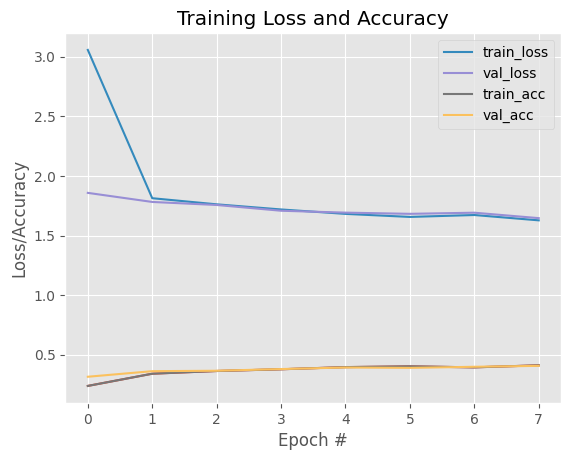

In [12]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,epochs),tf.history["accuracy"])
plt.plot(np.arange(0, epochs), tf.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), tf.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), tf.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), tf.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()